# Objectives

- Assess the performance of machine learning models

- Diagnose the common problems in machine learning algorithms 

- Evaluate the predictive models using the different performance metrics


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                 header=None, index_col=0)

In [3]:
df

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [4]:
target = df[1]
target.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: 1, dtype: float64

In [5]:
from sklearn.preprocessing import LabelEncoder

Take the independent variables as X and the column 1 as dependent variable. Use LabelEncoder for converting labels into integers.

In [6]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder() # instantiate LabelEncoder 
y = le.fit_transform(y) # Fit le object and then transform labels to integers 
print(' Actual y labels: {}\n'.format(df.loc[:, 1].values[:5]),
      'Transformed y values: {}\n'.format(y[:5]),
      'All labels available in the data {}'.format(le.classes_))

 Actual y labels: ['M' 'M' 'M' 'M' 'M']
 Transformed y values: [1 1 1 1 1]
 All labels available in the data ['B' 'M']


Alternative way to do this:  
```
df[1].map('M': 1, 'B': 0)
```  
But doing it with LabelEncoder() allows it to be fit into a Pipeline

In [7]:
import numpy as np
print(np.unique(y, return_counts = True)) # number of 1's and 0's after transformation
print(np.unique(df.loc[:, 1], return_counts = True)) # Counts for each label in the original data

(array([0, 1]), array([357, 212], dtype=int64))
(array(['B', 'M'], dtype=object), array([357, 212], dtype=int64))


In [8]:
y.mean()

0.37258347978910367

__Train test split__

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

__Pipelines: Transformers and Estimators__ 

In [11]:
# preprocessing tools
from sklearn.preprocessing import StandardScaler # for scaling the features
from sklearn.preprocessing import PolynomialFeatures # for checking interaction effect between features

## models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
    
# for pipelines
from sklearn.pipeline import make_pipeline

In [12]:
## Let's start with Logistic Regression'

log_pipe = make_pipeline(StandardScaler(), # if we want to use regularization we need scaler 
                         PolynomialFeatures(degree=2, interaction_only= True), # we will only check the interactions, 
                         LogisticRegression(random_state = 1, solver = 'lbfgs'))

## Without further ado check the baseline

log_pipe.fit(X_train, y_train) # pipe behaves like sklearn estimator.

y_pred = log_pipe.predict(X_train) # predictions of vanilla log_reg model.

log_pipe.score(X_train, y_train) # score looks pretty impressive can we expect similar performance on the test?

0.9976525821596244

__An overview look for the pipelines__

<img src='img/pipelines.png' width = 450/>

[Source: Python Machine Learning](https://www.amazon.com/dp/1789955750?tag=duckduckgo-ffab-20&linkCode=osi&th=1&psc=1)

__Cross validation with pipelines__

__Holdout Cross_Validation__
<img src= 'img/cross_validation.png' width = 450/>

__Kfold Cross_Validation__

<img src = 'img/kfold_cross.png' width= 450/>

__Understanding Over or Underfitting__

In [13]:
import numpy as np

In [14]:
from sklearn.model_selection import validation_curve

parameters = [0.01, 0.1, 1, 10, 100] # we will be checking the regularization parameter in Log_reg

# we could do the same thing with

parameters = np.logspace(-3,2,5)

np.set_printoptions(suppress= True)

parameters

array([  0.001     ,   0.01778279,   0.31622777,   5.62341325,
       100.        ])

Now let's see how the train and validation scores are changing as we change C - Values:

In [15]:
train_scores, test_scores = validation_curve(estimator=log_pipe,
                                             X=X_train,
                                             y=y_train,
                                             # this is the way for accessing a parameter of a
                                             param_name='logisticregression__C',
                                             # transformer within pipeline
                                             param_range=parameters,
                                             cv=10,  # note that this can take too long if your data is big
                                             verbose=1,  # algorithms will update us about the progress
                                             n_jobs=-1  # we will be using the other processing units in parallel
                                             )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


Now we can simply plot the results

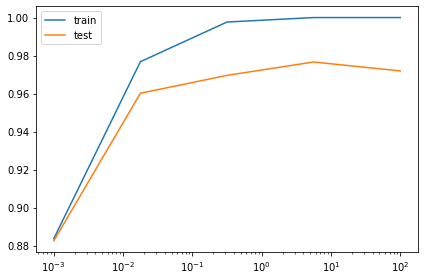

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(parameters, train_scores.mean(axis= 1), label = 'train')
plt.xscale('log')
plt.plot(parameters, test_scores.mean(axis = 1), label = 'test')
plt.legend()
plt.tight_layout()


__Fine-Tuning ML models via gridsearch__

GridSearch approach is very straight forward.

__Step1:__ Decide an estimator to use. (Remember that 'estimator' is a sklearn term for classifier.)

Suppose we would like to use a decision_tree classifier.

__Step2:__ Create a parameter grid

Suppose for the decision trees we would like to find best values for: 
```
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
```
and 
```
max_features = ['auto', 'sqrt', 'log2', 25]

param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              'max_features': [None, 'sqrt', 'log2', 25]
              }
```              
__Step3:__ Instantiate `GridSearchCV` with these parameters.

__Step4:__ Fit `GridSearchCV` object.


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
from sklearn.model_selection import GridSearchCV

Note that there is some randomness here, as decision trees are subject to randomness.

On the other hand, logistic regressions and KNNs, for example, are not subject to randomness.

In [19]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=1)

max_depth_params = range(2, 12)  # values between 2 to 11 total: 10 values

max_features_param = [None, 'sqrt', 'log2', 1, 5]  # total of 5 values

param_grid = {'max_depth': max_depth_params,
              'max_features': max_features_param}

# Instantiate the function
gridsearch = GridSearchCV(estimator=tree_clf,
                          param_grid=param_grid,
                          n_jobs=-1,  # parallel computation
                          verbose=1,  # gives feedback
                          cv=5,  # cross-validate (i.e. K folds)
                          scoring='roc_auc',  # you can use multiple scoring too
                          return_train_score=True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished


In [20]:
gridsearch.best_params_

{'max_depth': 6, 'max_features': 'log2'}

In [21]:
print(gridsearch.best_score_) # note if you use multiple this doesn't work
print(gridsearch.best_estimator_) # doesn't work for multiple scoring

0.9759062366154956
DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=10,
                       random_state=1)


In [22]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

In [23]:
columns = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

In [24]:
# Recall that gridsearch.best_estimator is an decisiontreeclassifier object
# so score returns 'accuracy' by default
gridsearch.best_estimator_.score(X_train, y_train)

0.9553990610328639

In [25]:
cv_results_df[columns].sort_values(by = 'rank_test_score').head(10)
# Remember that score, in this case, refers to ROC-AUC

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
22,"{'max_depth': 6, 'max_features': 'log2'}",0.975906,0.018972,1,0.991218,0.001770
37,"{'max_depth': 9, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
27,"{'max_depth': 7, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
32,"{'max_depth': 8, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
42,"{'max_depth': 10, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
47,"{'max_depth': 11, 'max_features': 'log2'}",0.975548,0.018663,2,0.991104,0.001944
17,"{'max_depth': 5, 'max_features': 'log2'}",0.974831,0.018115,7,0.990312,0.003337
28,"{'max_depth': 7, 'max_features': 1}",0.974263,0.017295,8,0.990362,0.001327
48,"{'max_depth': 11, 'max_features': 1}",0.974263,0.017295,8,0.990362,0.001327
43,"{'max_depth': 10, 'max_features': 1}",0.974263,0.017295,8,0.990362,0.001327


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

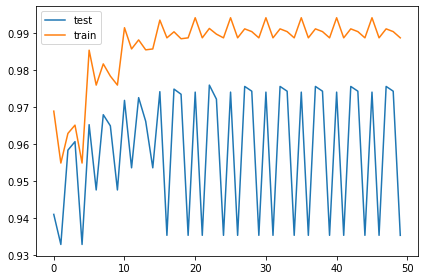

In [27]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(50), roc_test_scores, label = 'test')
plt.plot(range(50), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

We can also use pipelines with GridSearchCV. 

In [28]:
log_pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [29]:
# Recall how to modify parameters within a pipeline:
param_grid = {'logisticregression__C': np.logspace(-3, 2, 10),  
              'polynomialfeatures__interaction_only': [True, False]}


gridsearch = GridSearchCV(estimator = log_pipe, 
                          param_grid = param_grid,
                          n_jobs = -1, 
                          verbose = 1,
                          cv = 10, 
                          scoring = 'roc_auc', 
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


In [30]:
## let's see best score and best parameters

gridsearch.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('logisticregression',
                 LogisticRegression(C=0.1668100537200059, random_state=1))])

In [31]:
gridsearch.best_score_

0.9927884615384615

In [32]:
gridsearch.cv_results_

{'mean_fit_time': array([0.03530488, 0.04368398, 0.04986608, 0.05475345, 0.0815819 ,
        0.06652195, 0.077214  , 0.07155132, 0.08111985, 0.09395027,
        0.1128773 , 0.1030694 , 0.11907885, 0.14479263, 0.15230615,
        0.14581027, 0.15730398, 0.14985271, 0.15796556, 0.16536746]),
 'std_fit_time': array([0.00838069, 0.00665832, 0.01107989, 0.01030223, 0.02665494,
        0.01554008, 0.01538627, 0.01455954, 0.01118032, 0.02087093,
        0.020747  , 0.01096601, 0.01495405, 0.01582135, 0.01981226,
        0.02351891, 0.01912251, 0.0140719 , 0.01630658, 0.02247634]),
 'mean_score_time': array([0.00349193, 0.00418875, 0.00389066, 0.00428865, 0.00817912,
        0.00428803, 0.00708168, 0.00430863, 0.00511196, 0.00449843,
        0.00420334, 0.00515749, 0.00451331, 0.00702062, 0.00400472,
        0.00564859, 0.00469725, 0.00401142, 0.00744565, 0.00424714]),
 'std_score_time': array([0.00066823, 0.00146477, 0.00029959, 0.00134101, 0.01128147,
        0.00089707, 0.00545226, 0.000795

In [33]:
columns = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

log_reg_results = pd.DataFrame(gridsearch.cv_results_)[columns]
log_reg_results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,"{'logisticregression__C': 0.1668100537200059, ...",0.992788,0.009508,1,0.999817,0.000071
6,{'logisticregression__C': 0.046415888336127795...,0.992575,0.010337,2,0.999195,0.000225
7,{'logisticregression__C': 0.046415888336127795...,0.992121,0.011486,3,0.999294,0.000217
9,"{'logisticregression__C': 0.1668100537200059, ...",0.992112,0.011341,4,0.999843,0.000073
5,"{'logisticregression__C': 0.01291549665014884,...",0.991417,0.012198,5,0.997869,0.000452
4,"{'logisticregression__C': 0.01291549665014884,...",0.991400,0.011428,6,0.997796,0.000472
11,"{'logisticregression__C': 0.5994842503189409, ...",0.991150,0.011069,7,1.000000,0.000000
10,"{'logisticregression__C': 0.5994842503189409, ...",0.991124,0.010840,8,1.000000,0.000000
12,"{'logisticregression__C': 2.1544346900318843, ...",0.990162,0.011817,9,1.000000,0.000000
13,"{'logisticregression__C': 2.1544346900318843, ...",0.989948,0.012203,10,1.000000,0.000000


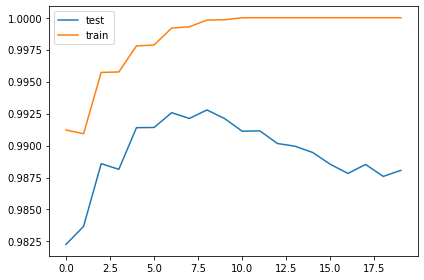

In [34]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(20), roc_test_scores, label = 'test')
plt.plot(range(20), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
gs = GridSearchCV(estimator= log_pipe, param_grid = param_grid, scoring = 'roc_auc', cv = 2 )

scores = cross_val_score(gs, X_train, y_train, scoring = 'roc_auc', cv = 5)

print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores), np.std(scores)))

CV accuracy: 0.992 +/- 0.007


In [37]:
y_test_pred = gridsearch.best_estimator_.predict_proba(X_test)[:, 1]

In [38]:
y_test_pred[:5]

array([0.0268781 , 0.02032053, 1.        , 0.00427869, 0.00070141])

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(y_test, y_test_pred)

0.9926624737945493

## Extras

[Faster Hyperparameter tuning: Randomized Approach](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

[Learning the hyperparameter space](https://towardsdatascience.com/automated-machine-learning-hyperparameter-tuning-in-python-dfda59b72f8a)

[Using sklearn for plotting learning curves](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

[YellowBrick Validation Curve](https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html)